Libraries

In [12]:
import pandas as pd
import numpy as np

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [14]:
df = pd.read_csv("Data.csv")
print(df)

       Total Household Income              Region  Staple Food Expenditure  \
0                        9370                 CAR                     1736   
1                        3540                 CAR                      718   
2                        1478                 CAR                     1281   
3                        2199                 CAR                     1273   
4                        4732                 CAR                     1386   
...                       ...                 ...                      ...   
41539                    3820  XII - SOCCSKSARGEN                      906   
41540                    3850  XII - SOCCSKSARGEN                      159   
41541                    4138  XII - SOCCSKSARGEN                     1076   
41542                    4231  XII - SOCCSKSARGEN                     1206   
41543                    4181  XII - SOCCSKSARGEN                     1676   

                 Source of Income  Agricultural Household indic

In [8]:
isnull = df.isnull().sum()
print(isnull)

Total Household Income                     0
Region                                     0
Staple Food Expenditure                    0
Source of Income                           0
Agricultural Household indicator           0
Meat Expenditure                           0
Seafood Expenditure                        0
Leisure Expenditure                        0
Alcohol Expenditure                        0
Tobacco Expenditure                        0
Medical Expenditure                        0
Transportation Expenditure                 0
Communication Expenditure                  0
Utilities Expenditure                      0
Housing Tax                                0
Education Expenditure                      0
Crop Farming Expenditure                   0
Household Head Gender                      0
Household Head Age                         0
Household Head Marital Status              0
Household Head Highest Grade Completed     0
Education Rank                             0
Household 

In [9]:
statistics = df.describe()
print(statistics)

       Total Household Income  Staple Food Expenditure  \
count            41544.000000             41544.000000   
mean              5391.412310               908.705108   
std               6946.279063               472.302660   
min                214.000000                 0.000000   
25%               2309.000000               604.000000   
50%               3662.000000               848.000000   
75%               6233.250000              1142.000000   
max             342632.000000             27322.000000   

       Agricultural Household indicator  Meat Expenditure  \
count                      41544.000000      41544.000000   
mean                           0.429858        188.230310   
std                            0.676666        187.459972   
min                            0.000000          0.000000   
25%                            0.000000         60.000000   
50%                            0.000000        131.000000   
75%                            1.000000        255

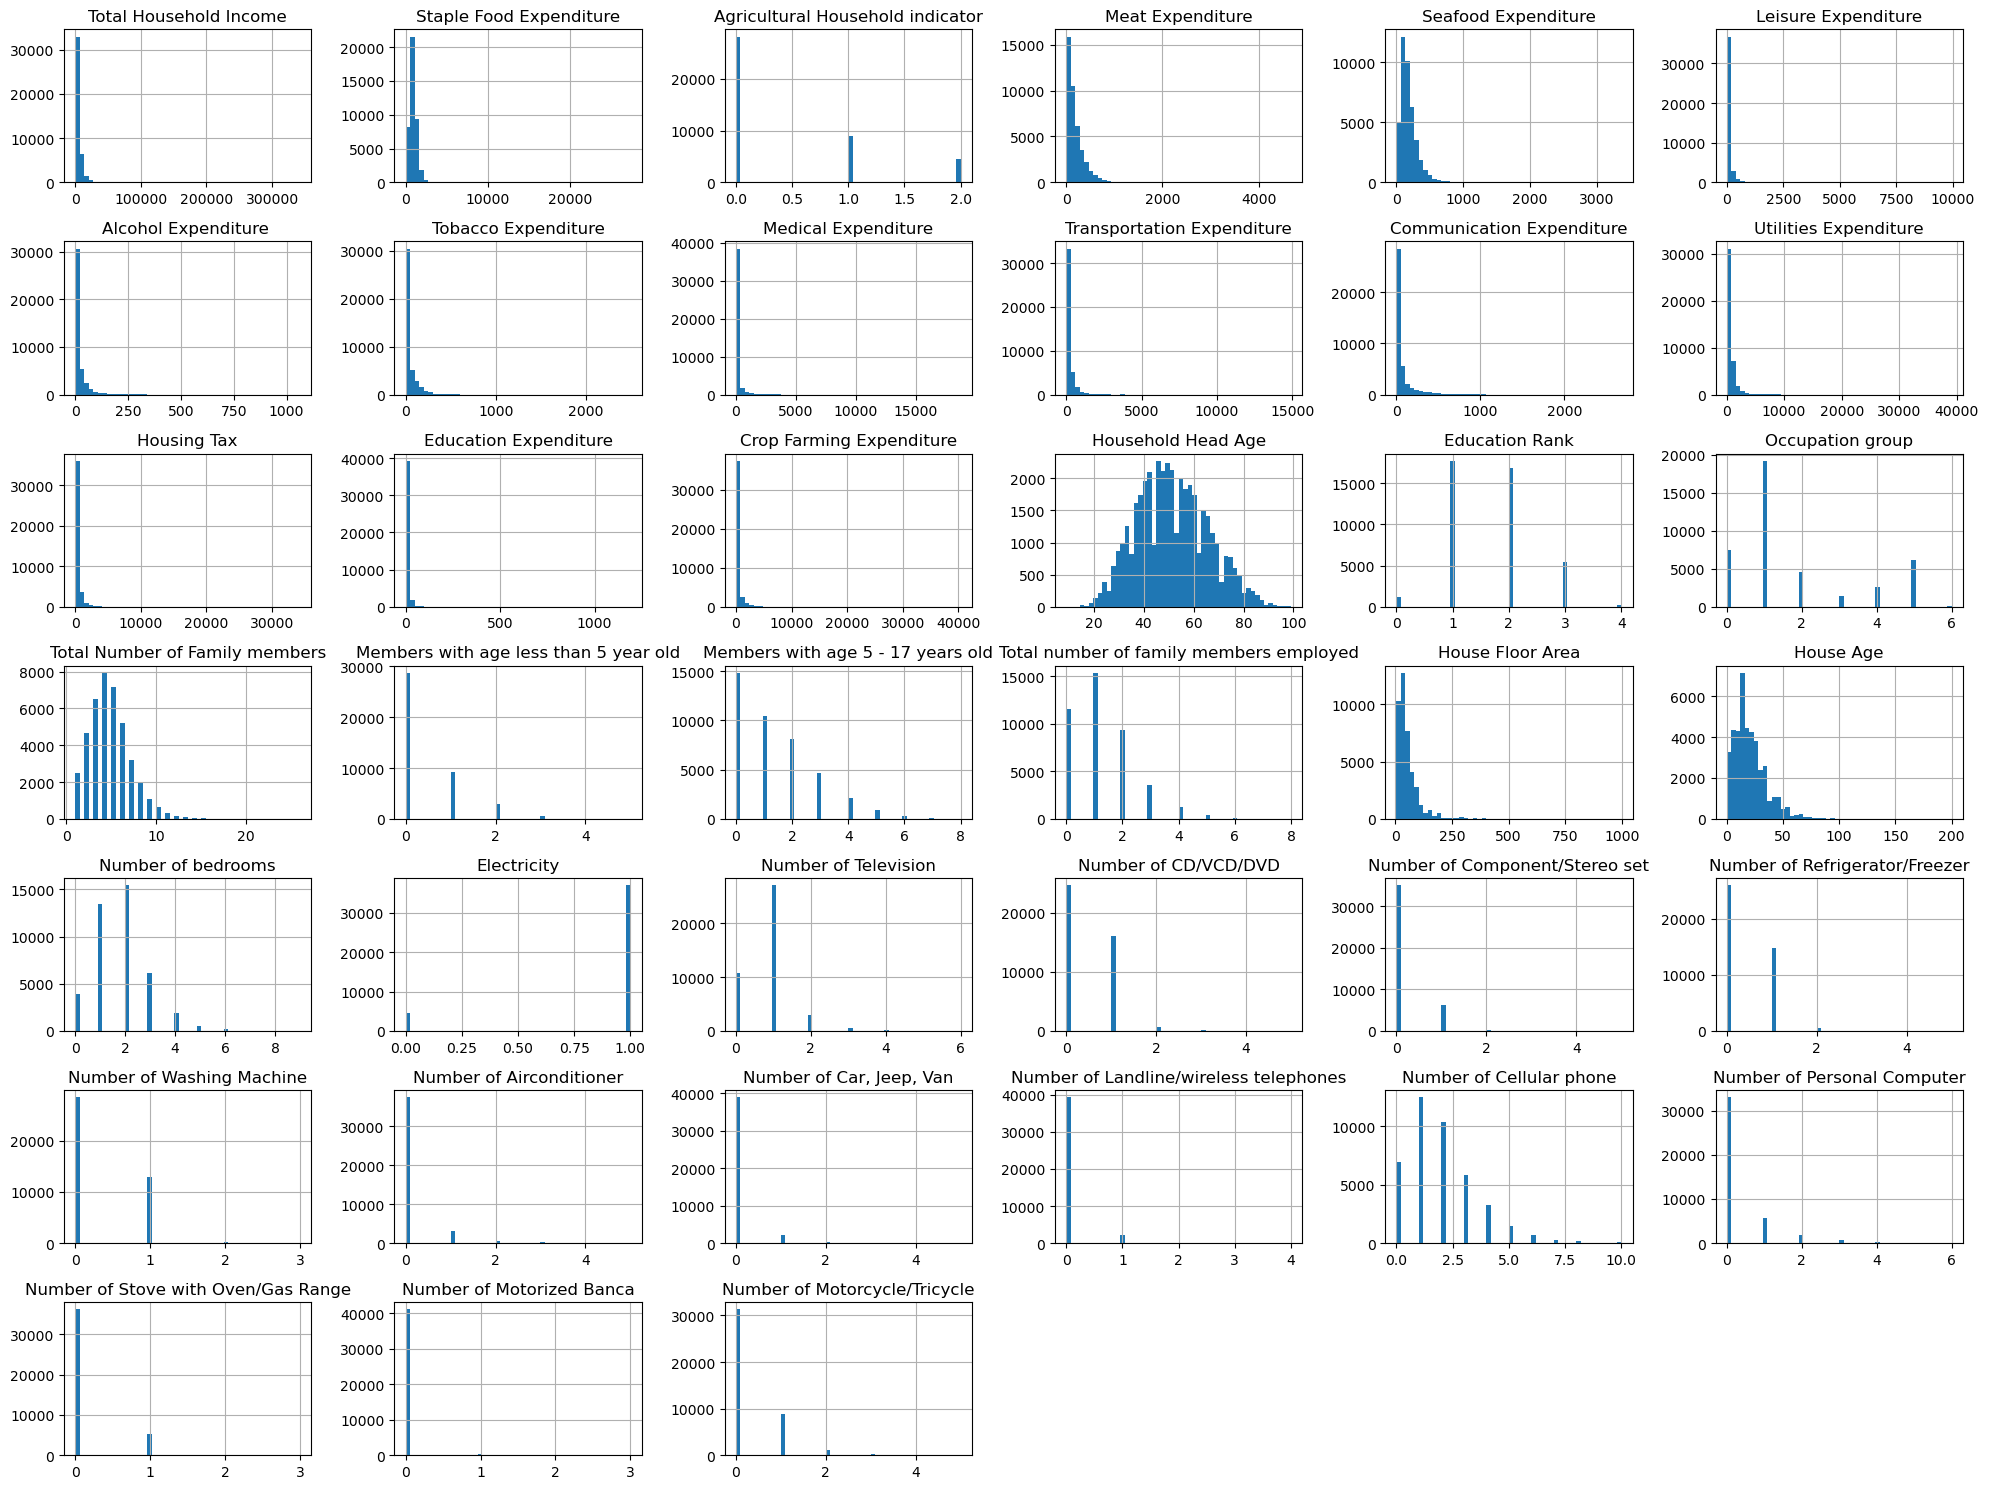

In [10]:
df.hist(figsize=(20, 15), bins=50)
plt.tight_layout()
plt.show()

In [11]:
#Normalization 
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = df.select_dtypes(include=[np.number]).columns

# Apply the scaler to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df.head())

   Total Household Income Region  Staple Food Expenditure Source of Income  \
0                0.026739    CAR                 0.063539             Wage   
1                0.009713    CAR                 0.026279             Wage   
2                0.003691    CAR                 0.046885             Wage   
3                0.005797    CAR                 0.046592             Wage   
4                0.013194    CAR                 0.050728             Wage   

   Agricultural Household indicator  Meat Expenditure  Seafood Expenditure  \
0                               0.0          0.094412             0.089259   
1                               0.0          0.066581             0.058911   
2                               0.5          0.029758             0.013686   
3                               0.0          0.041747             0.057423   
4                               0.0          0.070221             0.060101   

   Leisure Expenditure  Alcohol Expenditure   Tobacco Expendit

In [16]:
# Define the spending columns
spending_columns = [
    'Staple Food Expenditure', 'Meat Expenditure', 'Seafood Expenditure', 
    'Leisure Expenditure', 'Alcohol Expenditure ', 'Tobacco Expenditure', 
    'Medical Expenditure', 'Transportation Expenditure', 'Communication Expenditure', 
    'Utilities Expenditure', 'Housing Tax', 'Education Expenditure', 
    'Crop Farming Expenditure'
]

# Filter the dataframe
df_cleaned = df[df[spending_columns].ge(df['Total Household Income'], axis=0).all(axis=1)]

print(df_cleaned)

Empty DataFrame
Columns: [Total Household Income, Region, Staple Food Expenditure, Source of Income, Agricultural Household indicator, Meat Expenditure, Seafood Expenditure, Leisure Expenditure, Alcohol Expenditure , Tobacco Expenditure, Medical Expenditure, Transportation Expenditure, Communication Expenditure, Utilities Expenditure, Housing Tax, Education Expenditure, Crop Farming Expenditure, Household Head Gender, Household Head Age, Household Head Marital Status, Household Head Highest Grade Completed, Education Rank, Household Head Job Indicator, Household Head Occupation, Household Head Class of Worker, Occupation group, Type of Household, Total Number of Family members, Members with age less than 5 year old, Members with age 5 - 17 years old, Total number of family members employed, House Floor Area, House Age, Number of bedrooms, Tenure Status, Electricity, Main Source of Water Supply, Number of Television, Number of CD/VCD/DVD, Number of Component/Stereo set, Number of Refrig

In [17]:
# Define the columns that represent sources of income
income_columns = [
    'Wage', 'Enterpreneurial Activities', 'Other Sources of Income'
]

# Ensure the columns exist in the dataframe
for col in income_columns:
    if col not in df.columns:
        df[col] = 0

# Create a new column 'Total Income' by summing up the income columns
df['Total Income'] = df[income_columns].sum(axis=1)

print(df[['Total Household Income', 'Total Income']].head())

   Total Household Income  Total Income
0                    9370             0
1                    3540             0
2                    1478             0
3                    2199             0
4                    4732             0


Hypothesis
Hypothesis 1: Education Level and Total Expenditure
H1: Higher levels of education are associated with higher total household expenditure.
Rationale: Individuals with higher education levels may have better job opportunities and higher incomes, leading to increased spending on various goods and services.
Hypothesis 2: Education Level and Expenditure on Necessities
H2: Households with lower education levels spend a higher percentage of their total expenditure on necessities (e.g., food, housing, utilities) compared to households with higher education levels.
Rationale: Lower-educated households may have lower incomes, necessitating a larger portion of their budget to cover basic needs.

Eagle's Law, often referred to in the context of economics, suggests that as the level of education increases, the consumption patterns of households change, particularly in relation to necessities and luxuries. This law can be applied to Hypothesis 2, which states: "Households with lower education levels spend a higher percentage of their total expenditure on necessities (e.g., food, housing, utilities) compared to households with higher education levels.

Understanding Consumption Patterns:
According to Eagle's Law, as education levels rise, households tend to shift their consumption from necessities to discretionary or luxury items. This is because higher education often correlates with higher income, allowing households to allocate a smaller percentage of their income to basic needs.
Income and Expenditure Relationship:
Households with lower education levels typically have lower incomes, which means they must allocate a larger portion of their total expenditure to cover essential needs. Eagle's Law supports this by indicating that as education increases, the marginal utility derived from spending on necessities decreases, leading to a lower percentage of income spent on these items.


In order to test this hypothesis we apply a correlation matrix of Total household spending to the various types of expenses.


In [18]:
# Calculate the correlation matrix
correlation_matrix = df[['Total Household Income'] + spending_columns].corr()

# Extract the correlation values between 'Total Household Income' and each expenditure column
income_expenditure_correlation = correlation_matrix['Total Household Income'][spending_columns]

print(income_expenditure_correlation)

Staple Food Expenditure       0.288140
Meat Expenditure              0.495391
Seafood Expenditure           0.366838
Leisure Expenditure           0.344079
Alcohol Expenditure           0.146532
Tobacco Expenditure           0.063997
Medical Expenditure           0.266922
Transportation Expenditure    0.563468
Communication Expenditure     0.622691
Utilities Expenditure         0.598143
Housing Tax                   0.504441
Education Expenditure         0.212422
Crop Farming Expenditure      0.187399
Name: Total Household Income, dtype: float64


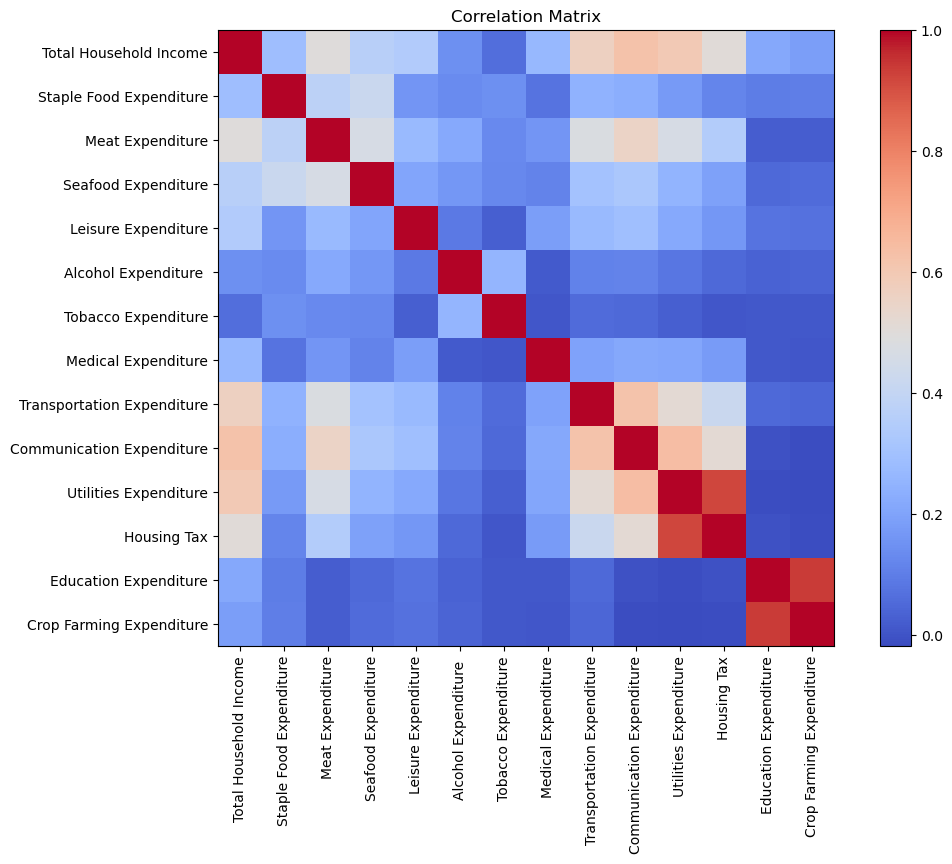

In [19]:
# Visualize the correlation matrix using numpy and matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title('Correlation Matrix')
plt.show()

from our output, our data suggests that more individual's income parttens is closly related to expenditure on staple food & least related to crop farming meaning perhaps those earning less will be the ones to adapt crop farming so as to better their income sourse, which make economic sense.

Our data also suggests that Egle's may not exatly be observed in our analysis, however we go ahead & test hypothesis



In [23]:
# Calculate the correlation between 'Total Household Income' and 'Education Expenditure'
income_education_correlation = df['Total Household Income'].corr(df['Education Expenditure'])

print(f"Correlation between Total Household Income and Education Expenditure: {income_education_correlation}")

Correlation between Total Household Income and Education Expenditure: 0.212422225309968


In [24]:
import statsmodels.api as sm

# Define the dependent variable (Education Expenditure) and the independent variable (Total Household Income)
X = df['Total Household Income']
y = df['Education Expenditure']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Create the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Education Expenditure   R-squared:                       0.045
Model:                               OLS   Adj. R-squared:                  0.045
Method:                    Least Squares   F-statistic:                     1963.
Date:                   Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                           17:00:46   Log-Likelihood:            -1.7102e+05
No. Observations:                  41544   AIC:                         3.421e+05
Df Residuals:                      41542   BIC:                         3.421e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
As regression model is not good, we can try to use other models like Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Total Household Income']]
y = df['Education Expenditure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 221.27398512867757
R^2 Score: 0.2282782749642155


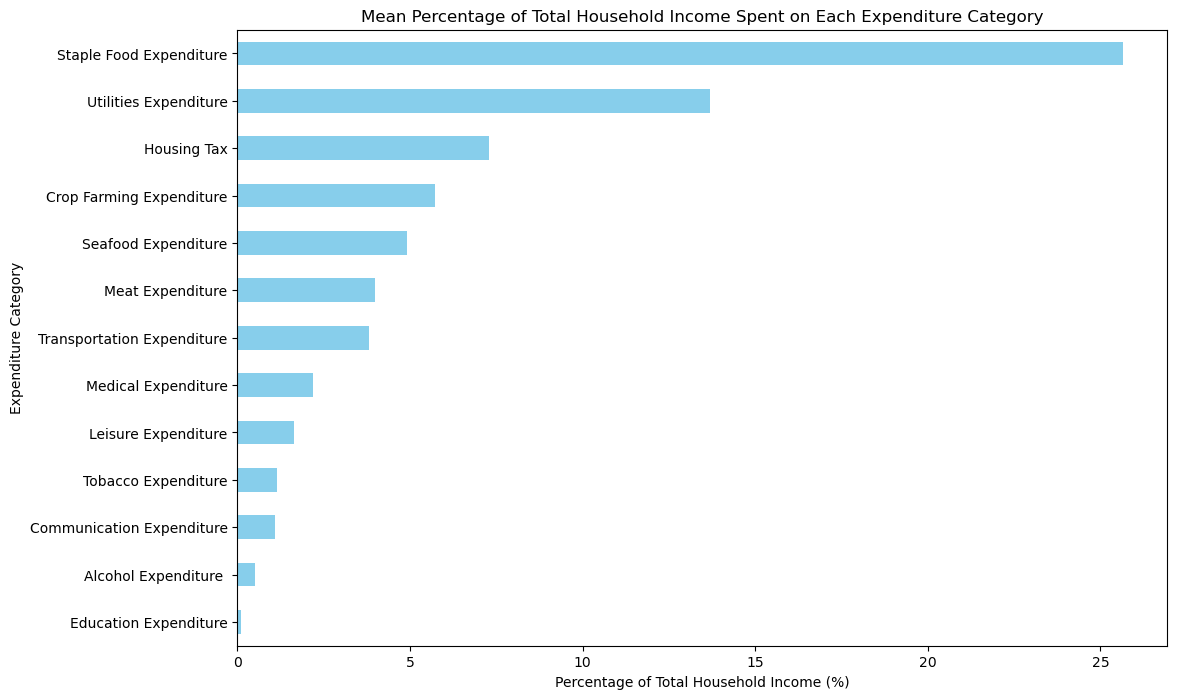

In [26]:
# Calculate the percentage of total household income spent on each expenditure category
percentage_expenditure = df[spending_columns].div(df['Total Household Income'], axis=0) * 100

# Calculate the mean percentage for each expenditure category
mean_percentage_expenditure = percentage_expenditure.mean()

# Plot the mean percentage expenditure
plt.figure(figsize=(12, 8))
mean_percentage_expenditure.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Percentage of Total Household Income (%)')
plt.ylabel('Expenditure Category')
plt.title('Mean Percentage of Total Household Income Spent on Each Expenditure Category')
plt.show()

based on the output above we safely reject our H1 hypothesis that suggests higher income linked to higher education expenditure. based on our data set income changes greatly impact staple food consumption.